In [1]:
import pandas as pd

df = pd.read_csv('Data/medical_examination.csv')
print(len(df))
df.head()

70000


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Normalize values so that 0 is always good and 1 is always bad

In [2]:
df.loc[df['cholesterol']==1,'cholesterol']=0
df.loc[df['cholesterol']>1,'cholesterol']=1
df.loc[df['gluc']==1,'gluc']=0
df.loc[df['gluc']>1,'gluc']=1
#df['active'] = 1 - df['active']
df['overweight']=df['weight']/(df['height']/100)**2
df.loc[df['overweight']<=25,'overweight']=0
df.loc[df['overweight']>25,'overweight']=1
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0.0


/home/kevin/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kevin/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kevin/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kevin/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

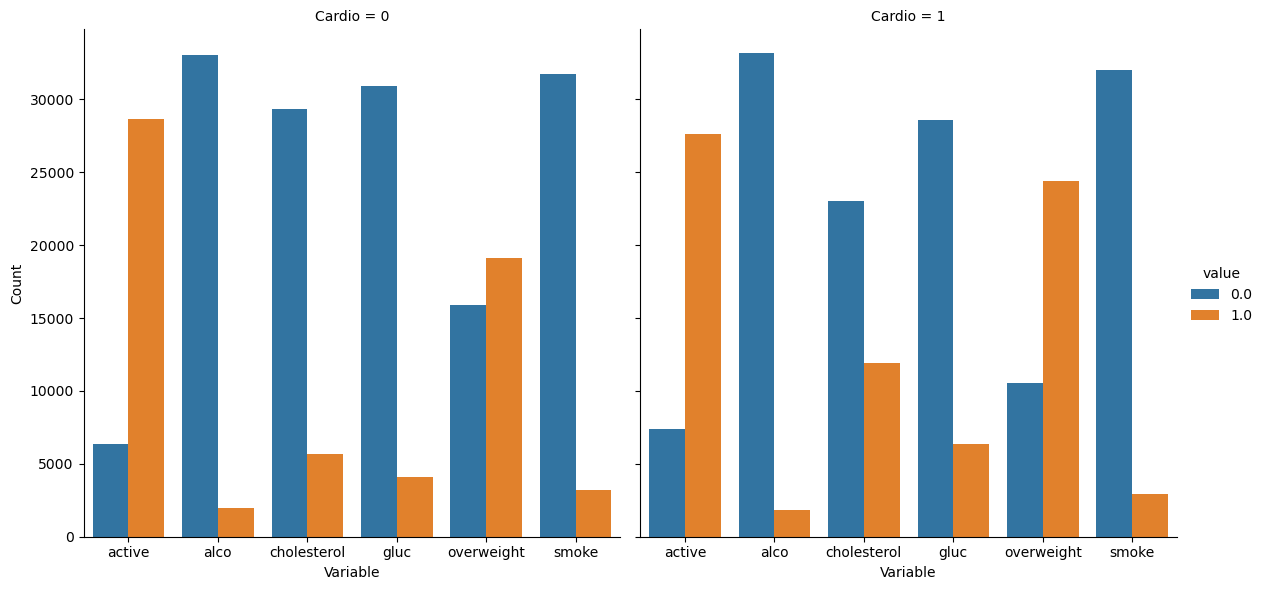

In [3]:
import seaborn as sns

melted_df = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

# Calculate the total count of each value for each variable and cardio category
count_data = melted_df.groupby(['variable', 'cardio', 'value']).size().reset_index(name='count')

# Create the catplot
g = sns.catplot(
    x='variable',
    y='count',
    hue='value',
    col='cardio',
    data=count_data,
    kind='bar',
    height=6,
    aspect=1
)

# Customize the plot
g.set_axis_labels('Variable', 'Count')
g.set_titles('Cardio = {col_name}')

## Cleaning data

In [4]:
df = df[df['ap_lo'] <= df['ap_hi']]
print(len(df))

68766


In [5]:
df = df[df['height'] >= df['height'].quantile(0.025)]
print(len(df))

67260


In [6]:
df = df[df['height'] <= df['height'].quantile(0.975)]
print(len(df))

65859


In [7]:
df = df[df['weight'] >= df['weight'].quantile(0.025)]
print(len(df))

64384


In [8]:
df = df[df['weight'] <= df['weight'].quantile(0.975)]
print(len(df))

62784


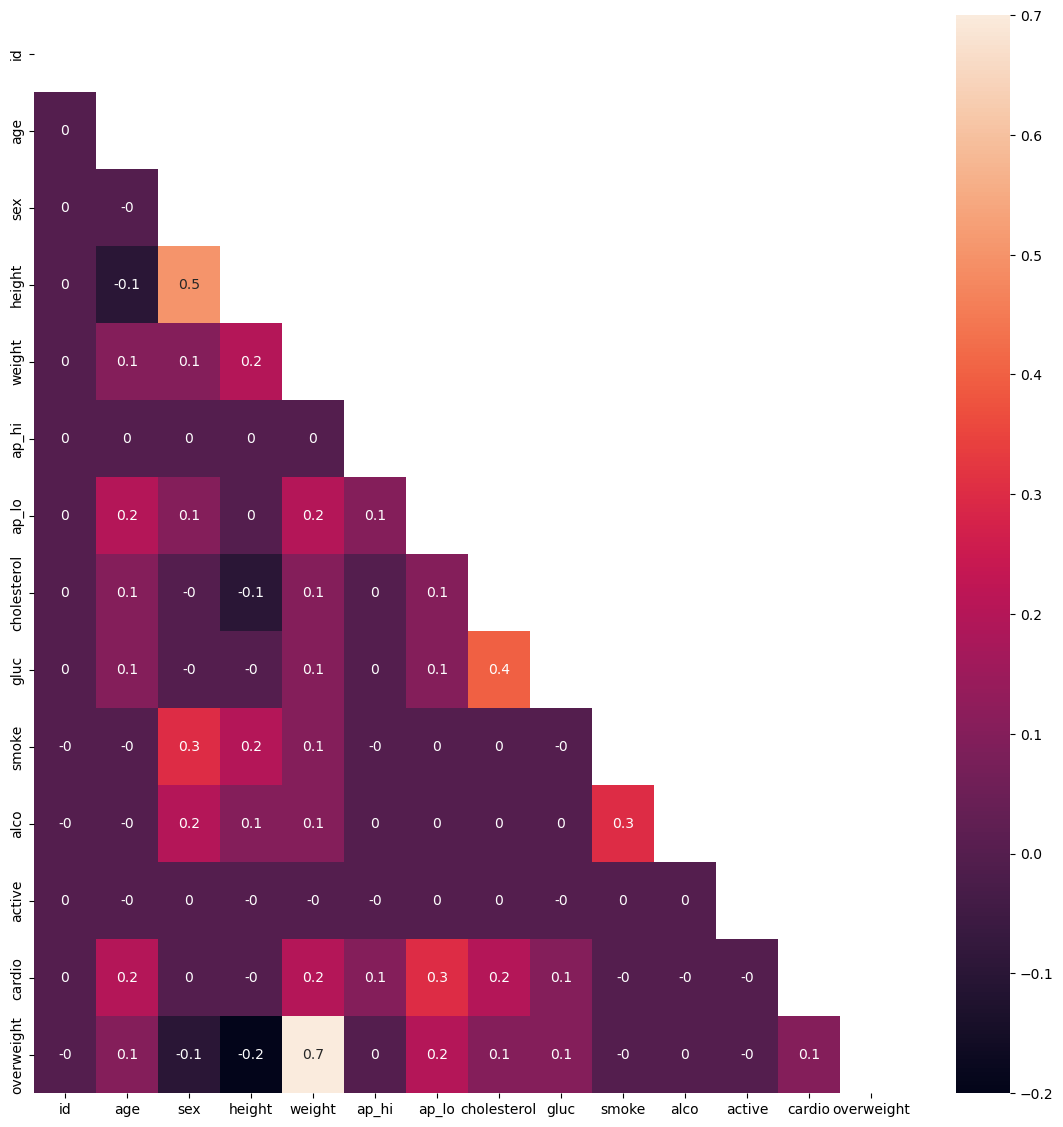

In [9]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

data = df.select_dtypes(include='number')


#get correlations of each features in dataset
corrmat = np.round(data.corr(),1)
mask = np.triu(np.ones_like(corrmat, dtype=bool))
plt.figure(figsize=(14,14))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap='rocket',mask=mask)